<a href="https://colab.research.google.com/github/FedericoValsagna/Aprendizaje-Automatico/blob/travel/travel_review_ratings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install pandas numpy matplotlib seaborn pycaret

In [ ]:
# Análisis de Reseñas de Viajes en Europa usando PyCaret
# Trabajo Práctico: Aprendizaje Automático 2024 - 2°C

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pycaret.classification import *
from pycaret.clustering import *


Cargando datos...

Realizando análisis exploratorio...
Dimensiones del dataset: (5456, 26)

Primeras 5 filas:
     User  Category 1  Category 2  Category 3  Category 4  Category 5  \
0  User 1         0.0         0.0        3.63        3.65         5.0   
1  User 2         0.0         0.0        3.63        3.65         5.0   
2  User 3         0.0         0.0        3.63        3.63         5.0   
3  User 4         0.0         0.5        3.63        3.63         5.0   
4  User 5         0.0         0.0        3.63        3.63         5.0   

   Category 6  Category 7  Category 8  Category 9  ...  Category 16  \
0        2.92         5.0        2.35        2.33  ...         0.59   
1        2.92         5.0        2.64        2.33  ...         0.59   
2        2.92         5.0        2.64        2.33  ...         0.59   
3        2.92         5.0        2.35        2.33  ...         0.59   
4        2.92         5.0        2.64        2.33  ...         0.59   

  Category 17  Category 

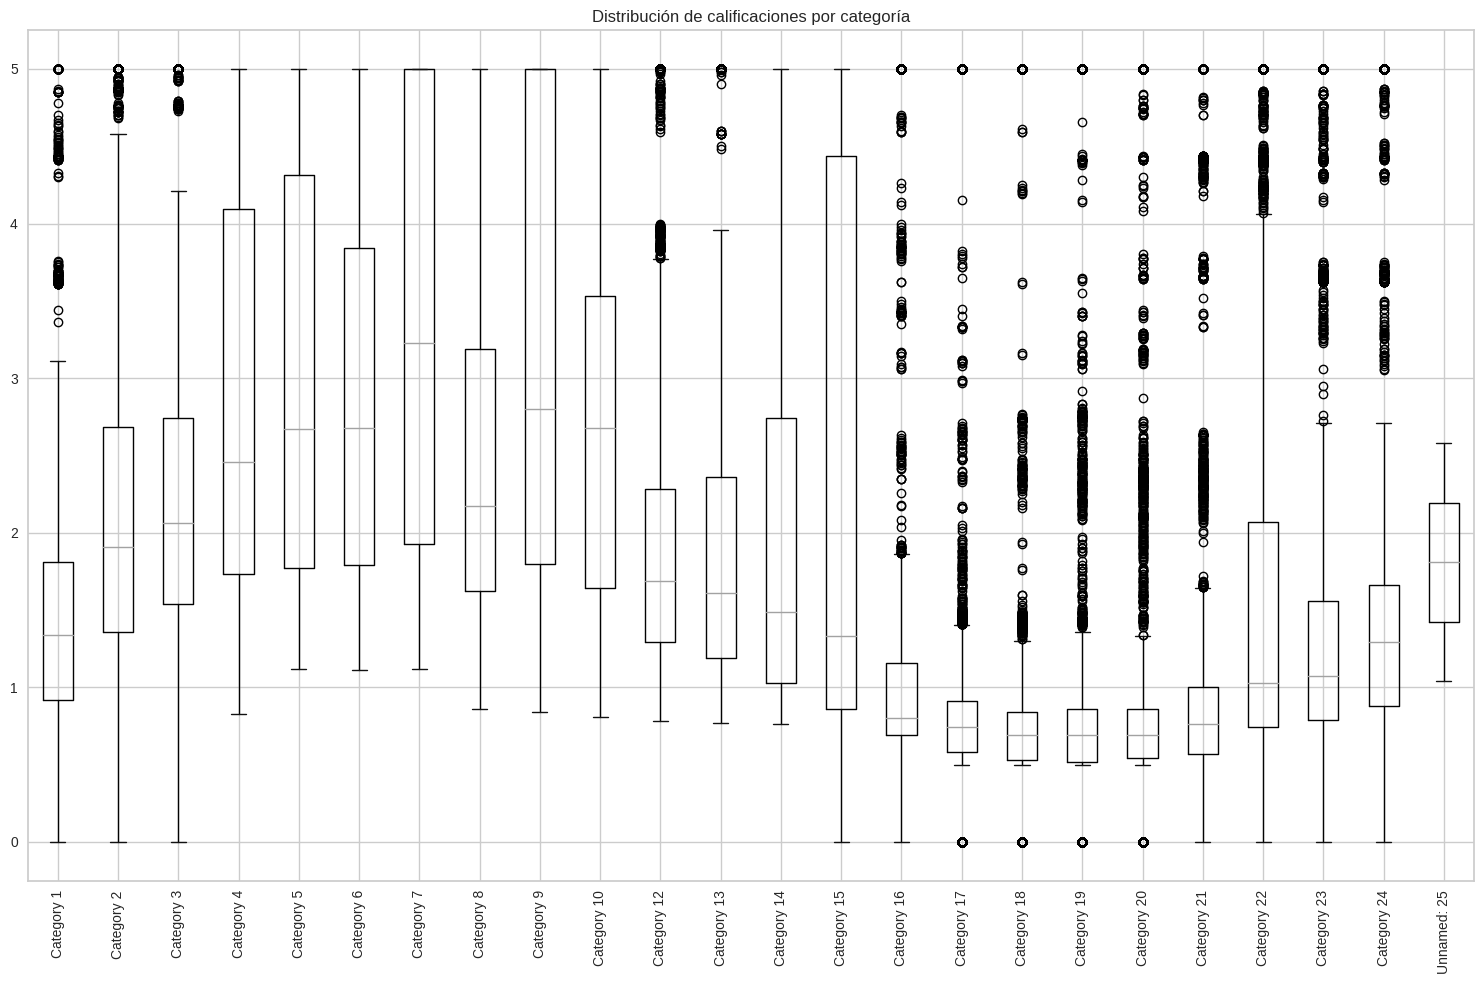

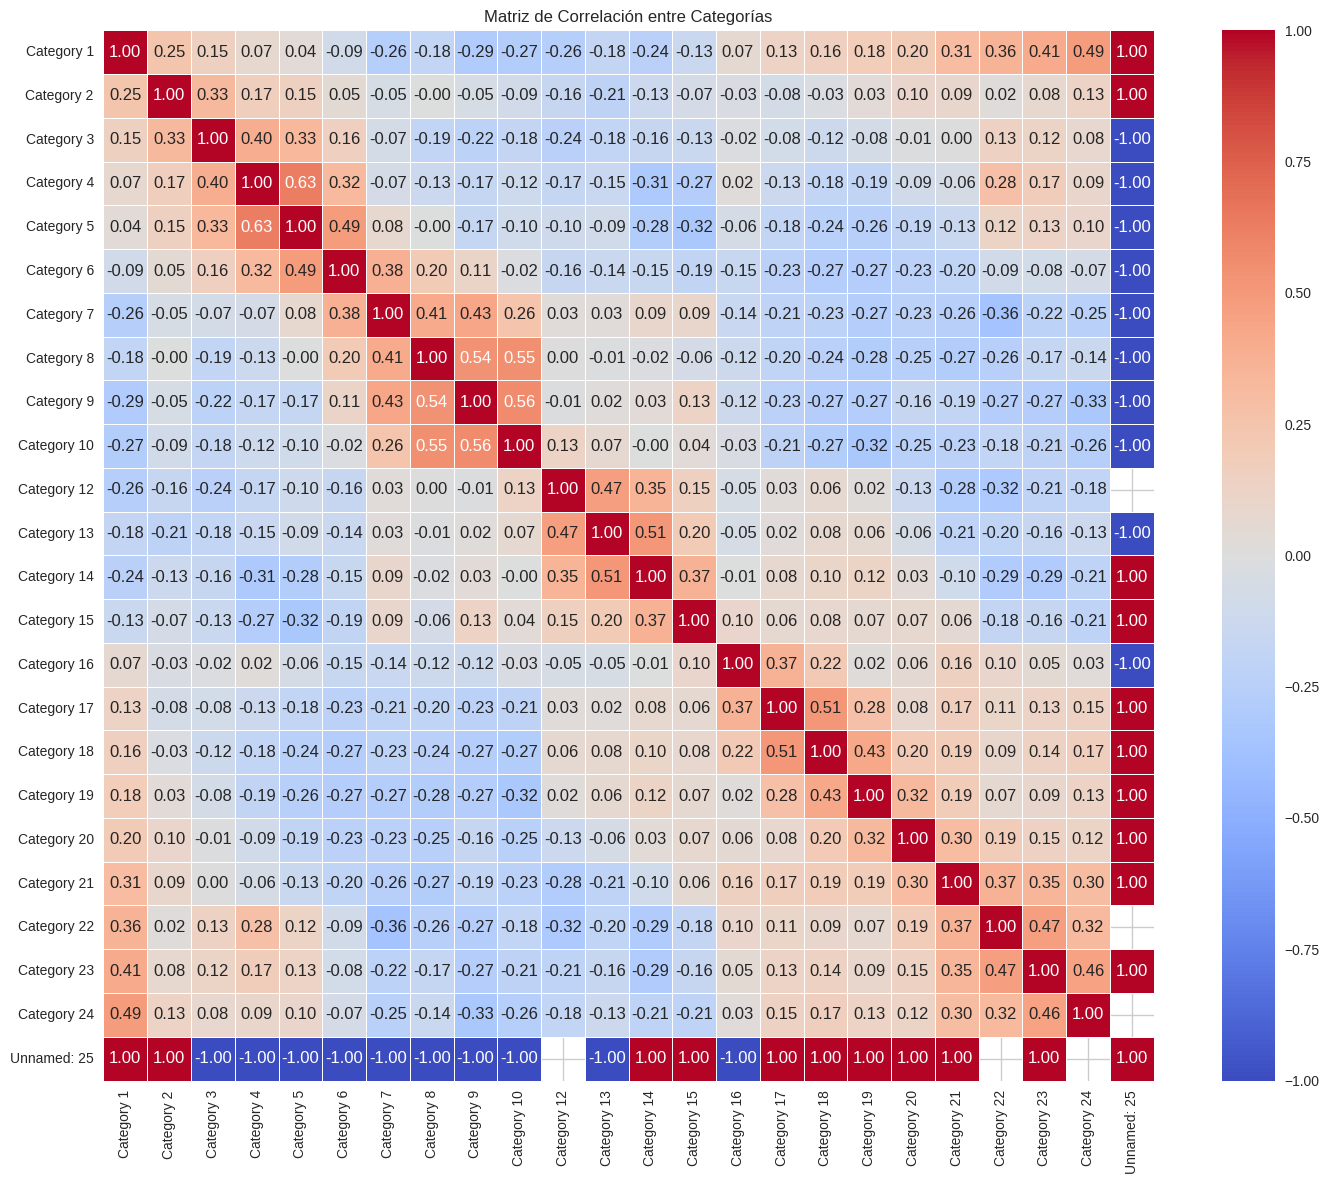

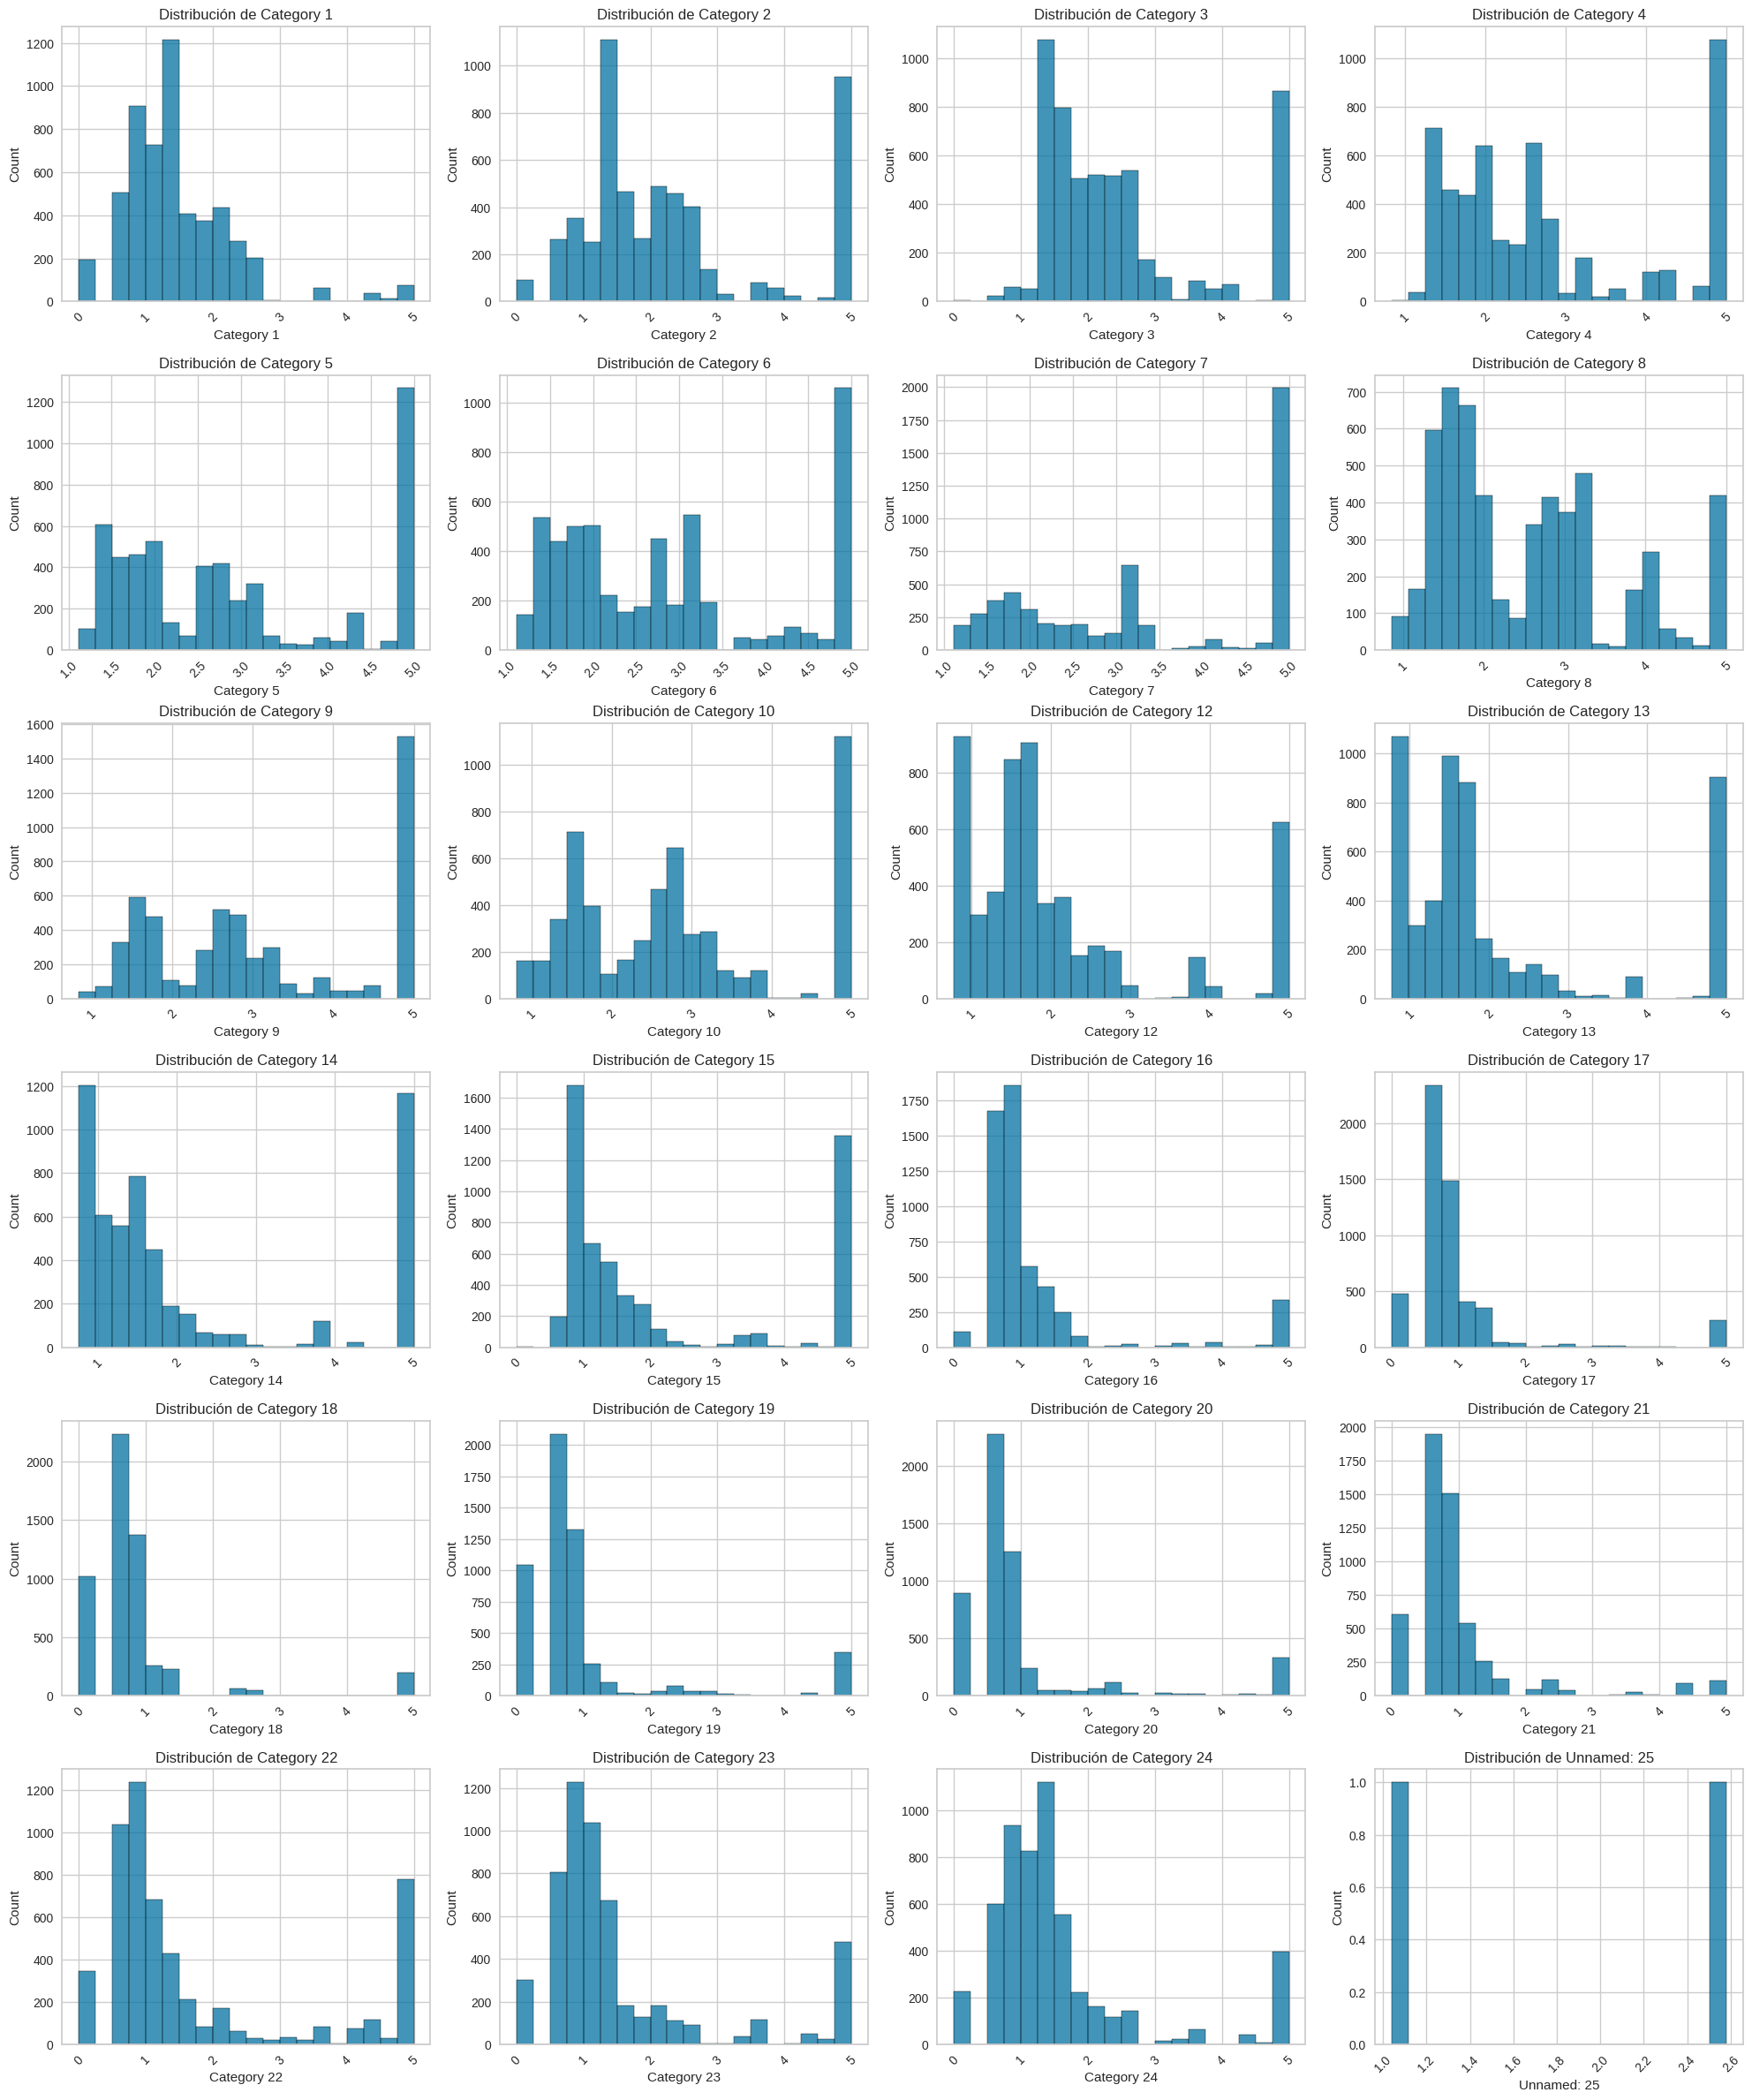


Preparando datos para modelado...


In [ ]:
# 1. Carga y Preparación de Datos
def cargar_datos():
    # Cargar datos del CSV
    df = pd.read_csv('google_review_ratings.csv')

    # Limpiar nombres de columnas (eliminar espacios en blanco si los hay)
    df.columns = df.columns.str.strip()

    return df

# 2. Análisis Exploratorio de Datos (EDA)
def realizar_eda(df):
    # Dimensiones del dataset
    print("Dimensiones del dataset:", df.shape)

    # Mostrar primeras filas
    print("\nPrimeras 5 filas:")
    print(df.head())

    # Información del dataset
    print("\nInformación del dataset:")
    print(df.info())

    # Estadísticas descriptivas (excluyendo la columna User)
    print("\nEstadísticas descriptivas:")
    print(df.select_dtypes(include=[np.number]).describe())

    # Distribución de calificaciones
    plt.figure(figsize=(15, 10))
    df_numeric = df.select_dtypes(include=[np.number])
    df_numeric.boxplot()
    plt.xticks(rotation=90)
    plt.title('Distribución de calificaciones por categoría')
    plt.tight_layout()
    plt.show()

    # Matriz de correlación
    plt.figure(figsize=(15, 12))
    correlation_matrix = df_numeric.corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f',
                square=True, linewidths=0.5)
    plt.title('Matriz de Correlación entre Categorías')
    plt.tight_layout()
    plt.show()

    # Distribución de valores por categoría
    fig, axes = plt.subplots(6, 4, figsize=(20, 24))
    axes = axes.ravel()

    for idx, col in enumerate(df_numeric.columns):
        if idx < len(axes):
            sns.histplot(data=df, x=col, bins=20, ax=axes[idx])
            axes[idx].set_title(f'Distribución de {col}')
            axes[idx].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

# 3. Preparación para Modelado
def preparar_datos(df):
    # Seleccionar solo las columnas numéricas (excluir la columna User)
    df_numeric = df.select_dtypes(include=[np.number])

    # Normalizar los datos
    df_scaled = (df_numeric - df_numeric.mean()) / df_numeric.std()

    return df_scaled

# Ejecución principal
if __name__ == "__main__":
    # 1. Cargar datos
    print("Cargando datos...")
    df = cargar_datos()

    # 2. Realizar EDA
    print("\nRealizando análisis exploratorio...")
    realizar_eda(df)

    # 3. Preparar datos
    print("\nPreparando datos para modelado...")
    df_prep = preparar_datos(df)



In [ ]:

from pycaret.clustering import setup, create_model, assign_model


Realizando clustering...


,Description,Value
0,Session id,123
1,Original data shape,"(5456, 24)"
2,Transformed data shape,"(5456, 24)"
3,Numeric features,24
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,zscore



Creando modelo de clustering...


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.1481,740.0533,2.0300,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]


Analizando resultados...

Características promedio por cluster:
           Category 1  Category 2  Category 3  Category 4  Category 5  \
Cluster                                                                 
Cluster 0   -0.336298   -0.070235   -0.429848   -0.459656   -0.364544   
Cluster 1   -0.854110   -0.896611   -0.663072   -0.869406   -0.917244   
Cluster 2    0.059606    0.246677    0.642415    0.938544    0.967273   
Cluster 3    1.081948    0.212124   -0.055818   -0.471224   -0.682799   

           Category 6  Category 7  Category 8  Category 9  Category 10  ...  \
Cluster                                                                 ...   
Cluster 0    0.170757    0.645628    0.838458    0.943195     0.686727  ...   
Cluster 1   -0.878476   -0.195096   -0.496521   -0.202707     0.036271  ...   
Cluster 2    0.507262   -0.078423   -0.216308   -0.345291    -0.216336  ...   
Cluster 3   -0.799296   -0.959908   -0.854173   -0.982880    -0.906835  ...   

           Category 1

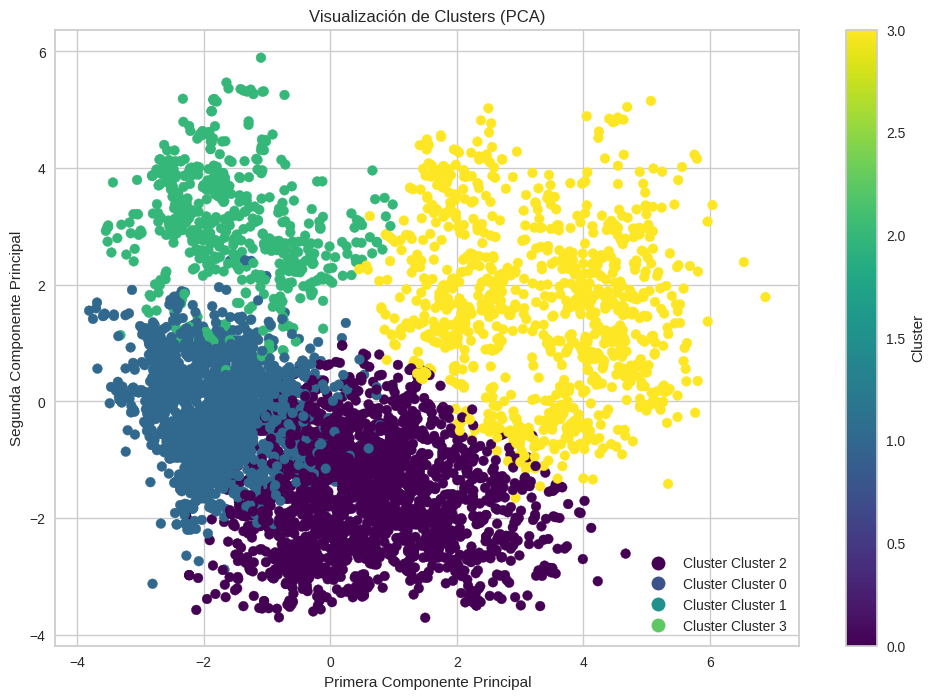


Características distintivas de cada cluster:

Cluster Cluster 2:
Top 5 categorías más valoradas:
Category 5     0.967273
Category 4     0.938544
Category 3     0.642415
Category 6     0.507262
Category 22    0.323388
Name: Cluster 2, dtype: float32

Top 5 categorías menos valoradas:
Category 15   -0.470728
Category 14   -0.409166
Category 9    -0.345291
Category 19   -0.294613
Category 18   -0.281397
Name: Cluster 2, dtype: float32

Cluster Cluster 0:
Top 5 categorías más valoradas:
Category 9     0.943195
Category 8     0.838458
Category 10    0.686727
Category 7     0.645628
Category 6     0.170757
Name: Cluster 0, dtype: float32

Top 5 categorías menos valoradas:
Category 4    -0.459656
Category 22   -0.436943
Category 3    -0.429848
Category 23   -0.421963
Category 5    -0.364544
Name: Cluster 0, dtype: float32

Cluster Cluster 1:
Top 5 categorías más valoradas:
Category 14    1.598297
Category 12    1.547555
Category 13    1.534724
Category 15    0.958805
Category 19    0.195153


In [ ]:
def realizar_clustering(df):
    # Rellenar NaN con 0 o la media
    df_clean = df.fillna(0)

    # Inicializar configuración de clustering
    setup(data=df_clean,
          normalize=True,
          session_id=123)

    # Crear modelo K-means
    print("\nCreando modelo de clustering...")
    modelo_final = create_model('kmeans', num_clusters=4)

    return modelo_final, df_clean  # Devolvemos también los datos limpios

def analizar_resultados(df, modelo):
    # Obtener asignaciones de clusters
    df_clusters = assign_model(modelo)

    # Convertir etiquetas de cluster a valores numéricos
    cluster_map = {name: i for i, name in enumerate(df_clusters['Cluster'].unique())}
    cluster_colors = df_clusters['Cluster'].map(cluster_map)

    # Analizar características de cada cluster
    print("\nCaracterísticas promedio por cluster:")
    cluster_means = df_clusters.groupby('Cluster').mean()
    print(cluster_means)

    # Visualización de clusters usando PCA
    from sklearn.decomposition import PCA
    pca = PCA(n_components=2)

    # Asegurarnos de que no hay NaN antes de PCA
    df_for_pca = df.fillna(0)
    df_pca = pd.DataFrame(pca.fit_transform(df_for_pca), columns=['PC1', 'PC2'])

    # Gráfico de clusters
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(df_pca['PC1'], df_pca['PC2'],
                         c=cluster_colors,  # Usamos los valores numéricos
                         cmap='viridis')
    plt.xlabel('Primera Componente Principal')
    plt.ylabel('Segunda Componente Principal')
    plt.title('Visualización de Clusters (PCA)')
    plt.colorbar(scatter, label='Cluster')

    # Agregar leyenda con mapeo de clusters
    legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                                markerfacecolor=plt.cm.viridis(i/len(cluster_map)),
                                label=f'Cluster {name}', markersize=10)
                      for name, i in cluster_map.items()]
    plt.legend(handles=legend_elements)

    plt.show()

    # Características principales de cada cluster
    print("\nCaracterísticas distintivas de cada cluster:")
    for cluster in df_clusters['Cluster'].unique():
        print(f"\nCluster {cluster}:")
        cluster_data = cluster_means.loc[cluster]
        print("Top 5 categorías más valoradas:")
        print(cluster_data.nlargest(5))
        print("\nTop 5 categorías menos valoradas:")
        print(cluster_data.nsmallest(5))

# Ejecución principal
if __name__ == "__main__":
    # 4. Realizar clustering
    print("\nRealizando clustering...")
    modelo, df_clean = realizar_clustering(df_prep)

    # 5. Analizar resultados
    print("\nAnalizando resultados...")
    analizar_resultados(df_clean, modelo)